In [1]:
import pandas as pd

df = pd.read_csv('us_confirmed.csv', 
    dtype={'Admin2':str, 'Date':object, 'Case':int}, 
    parse_dates=['Date'], 
    infer_datetime_format=True)
df.head(5)

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0,US,Alabama
1,Autauga,2020-01-23,0,US,Alabama
2,Autauga,2020-01-24,0,US,Alabama
3,Autauga,2020-01-25,0,US,Alabama
4,Autauga,2020-01-26,0,US,Alabama


In [3]:
df['Date'].describe()

/tmp/ipykernel_32332/3134759576.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date'].describe()


count                 2038620
unique                    610
top       2020-01-22 00:00:00
freq                     3342
first     2020-01-22 00:00:00
last      2021-09-22 00:00:00
Name: Date, dtype: object

In [34]:
df['id'] = df['Country/Region']+'/'+df['Province/State']+'/'+df['Admin2']
df['id'] = df.id.astype('category').cat.codes
df.drop(['Country/Region', 'Province/State', 'Admin2'], axis=1, inplace=True)
df.sample(5)

,Date,Case,id
211283,2020-09-01,7378,344
355112,2020-04-23,3,578
693252,2020-11-09,476,1132
1743893,2021-06-18,11193,2853
223452,2020-08-01,1649,364


In [35]:
df.drop(df[df['id']<0].index, inplace=True)

In [36]:
df['inc'] = df.groupby('id')['Case'].diff()
df.dropna(inplace=True)
df.head(100)

,Date,Case,id,inc
1,2020-01-23,0,0,0.0
2,2020-01-24,0,0,0.0
3,2020-01-25,0,0,0.0
4,2020-01-26,0,0,0.0
5,2020-01-27,0,0,0.0
...,...,...,...,...
96,2020-04-27,37,0,1.0
97,2020-04-28,39,0,2.0
98,2020-04-29,41,0,2.0
99,2020-04-30,42,0,1.0


In [37]:
df.drop(df[df['inc']<0].index, inplace=True)

In [38]:
df = df.groupby([pd.Grouper(key='Date', freq='1d'), 'id']).first().reset_index()
df.head(5)

,Date,id,Case,inc
0,2020-01-23,0,0,0.0
1,2020-01-23,1,0,0.0
2,2020-01-23,2,0,0.0
3,2020-01-23,3,0,0.0
4,2020-01-23,4,0,0.0


In [ ]:
df['Date'].describe(datetime_is_numeric=True)

In [ ]:
current_time = pd.Timestamp('2020-01-23 00:00:00')
interval = pd.Timedelta('1day')

In [ ]:
df[(df['Date'] == pd.Timestamp('2020-01-23 00:00:00')+400*interval) & (df['inc'] == 0)].count()

In [39]:
df.drop('Case', axis=1, inplace=True)

In [ ]:
df.to_csv('confirm.csv', index=False)

In [ ]:
df.describe()

In [22]:
current_time = pd.Timestamp('2020-01-23 00:00:00')
interval = pd.Timedelta('1day')

inc = []
for i in range(609):
    inc.append(df[(df['Date']==current_time) & (df['id']==1301)]['inc'].sum())
    current_time += interval

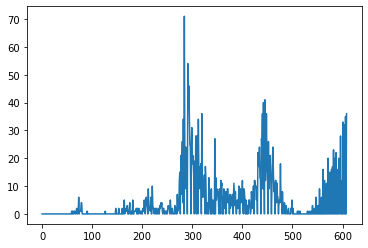

In [23]:
import matplotlib.pyplot as plt

plt.plot(inc)
plt.show()

In [110]:
df = pd.read_csv('confirm.csv', 
    dtype={'id':int, 'Date':object, 'inc':int}, 
    parse_dates=['Date'], 
    infer_datetime_format=True)
df.head(5)

,Date,id,inc,inc_id
0,2020-01-23,0,0,0
1,2020-01-23,1,0,0
2,2020-01-23,2,0,0
3,2020-01-23,3,0,0
4,2020-01-23,4,0,0


In [30]:
df['inc'] = df['inc'].apply(lambda row: min(row, 25000))

In [ ]:
import numpy as np

# inc_interval = np.concatenate(([0], np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1000, 100), np.arange(1000, 10000, 1000), [10000, 30000]))
inc_interval = np.arange(0, 506, 5)

inc_reduce = []
for i in range(101):
    inc_reduce.append(df[(df['Date']==current_time+600*interval) & (df['inc']>=inc_interval[i]) & (df['inc']<inc_interval[i+1])]['id'].count())

In [ ]:
import matplotlib.pyplot as plt

plt.plot(inc_reduce)
plt.show()

In [ ]:
#inc_interval = np.concatenate(([0], np.arange(1, 10, 1), np.arange(10, 100, 10), np.arange(100, 1000, 100), np.arange(1000, 10000, 1000), [10000]))
inc_interval = np.arange(0, 506, 5)

def inc_to_index(inc):
    global inc_interval
    for i in range(101):
        if inc < inc_interval[i+1]:
            return i

df['inc_id'] = df['inc'].apply(inc_to_index)

In [ ]:
plt.hist(df['inc_id'])
plt.show()

In [ ]:
inc_interval[37]

In [17]:
df['inc'] = df['inc'].apply(lambda row: min(row, 499))

In [65]:
import numpy as np
np.percentile(df_7d['inc'].to_numpy(), 95)

592.0

In [71]:
np.percentile(np.random.zipf(3.1, 100000), 95)

3.0

In [ ]:
df.to_csv('confirm_506.csv', index=False)

In [81]:
df_7d.describe()

,id,inc
count,232161.000000,232161.000000
mean,1646.717334,187.710352
std,966.306988,952.753464
min,0.000000,1.000000
25%,799.000000,8.000000
50%,1612.000000,31.000000
75%,2483.000000,111.000000
max,3335.000000,105716.000000


In [ ]:
plt.hist(np.random.normal(50, 12, 10000))

In [19]:
import pandas as pd

df = pd.read_csv('confirm_506.csv', 
    dtype={'id':int, 'Date':object, 'inc':int, 'inc_id':int}, 
    parse_dates=['Date'], 
    infer_datetime_format=True)
df.head(5)

,Date,id,inc,inc_id
0,2020-01-23,0,0,0
1,2020-01-23,1,0,0
2,2020-01-23,2,0,0
3,2020-01-23,3,0,0
4,2020-01-23,4,0,0


In [28]:
df['inc_id'] = df['inc'].apply(lambda x: int((x-1)/250))
df.to_csv('confirm_250.csv', index=False)

In [111]:
df_7d = df.groupby([pd.Grouper(key='Date', freq='7d'), 'id'])['inc'].sum().reset_index()
df_7d.head(5)

,Date,id,inc
0,2020-01-23,0,0
1,2020-01-23,1,0
2,2020-01-23,2,0
3,2020-01-23,3,0
4,2020-01-23,4,0


In [113]:
df_7d.drop(df_7d[df_7d['inc'] == 0].index, inplace=True)

In [114]:
df_7d['inc'] = df_7d['inc'].apply(lambda row: min(row, 10000))

In [109]:
df_7d['inc_id'] = df_7d['inc'].apply(lambda x: int((x-1)/100))
df_7d.to_csv('confirm_7d250.csv', index=False)

In [115]:
df_3d['inc_id'] = df_3d['inc'].apply(lambda x: int((x-1)/100))

NameError: name 'df_3d' is not defined

In [ ]:
df_3d.to_csv('confirm_3d.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

for i in range(203):
    plt.clf()
    plt.hist(df_3d[df_3d['Date']==pd.Timestamp('2020-01-24')+i*pd.Timedelta('7d')]['inc_id'], 100)
    plt.pause(0.01)
    plt.ioff()

In [ ]:
import numpy as np
freq = np.zeros(100)
for i in df_3d[df_3d['Date']==pd.Timestamp('2020-01-24')+202*pd.Timedelta('3d')]['inc_id']:
    freq[i] += 1
freq

In [11]:
df_3d.to_csv('confirm_1w.csv', index=False)

In [20]:
import pandas as pd

df = pd.read_csv('confirm_drop0.csv', 
    dtype={'id':int, 'Date':object, 'inc':int}, 
    parse_dates=['Date'], 
    infer_datetime_format=True)
df.head(5)

,Date,id,inc,inc_id
0,2020-01-24,638,1,0
1,2020-01-26,109,1,0
2,2020-01-26,214,1,0
3,2020-01-26,225,1,0
4,2020-01-29,1275,1,0


In [21]:
df_7d = df.groupby([pd.Grouper(key='Date', freq='7d'), 'id'])['inc'].first().reset_index()
df_7d.head(5)

,Date,id,inc
0,2020-01-24,109,1
1,2020-01-24,214,1
2,2020-01-24,225,1
3,2020-01-24,638,1
4,2020-01-24,1275,1


In [22]:
df_7d['inc_id'] = df_7d['inc'].apply(lambda x: int((x-1)/5))
df_7d.head(5)

,Date,id,inc,inc_id
0,2020-01-24,109,1,0
1,2020-01-24,214,1,0
2,2020-01-24,225,1,0
3,2020-01-24,638,1,0
4,2020-01-24,1275,1,0


In [24]:
df.to_csv('confirm_7d.csv', index=False)